# Import Library

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error, make_scorer

from sklearn.model_selection import GridSearchCV

from yellowbrick.model_selection import LearningCurve

import shap
import joblib

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Meningkatkan Ketepatan Penilaian Harga Rumah untuk Optimasi Strategi Penjualan Properti dengan Algoritma Machine Learning

## 1. Business Problem

### Latar Belakang

Sebagai perusahaan agen properti yang beroperasi di wilayah California, kami menghadapi tantangan besar dalam menentukan harga jual rumah yang kompetitif dan realistis. Nilai rumah di California sangat bervariasi yang dipengaruhi oleh lokasi geografis, usia bangunan, jumlah kamar, kepadatan populasi, dan tingkat pendapatan masyarakat sekitar.

Penilaian harga yang tidak akurat dapat berdampak langsung pada performa bisnis kami:
- Harga terlalu rendah → kerugian margin keuntungan.
- Harga terlalu tinggi → rumah sulit terjual dan memperpanjang waktu pemasaran.

Untuk tetap kompetitif dan memberikan layanan terbaik bagi klien kami (penjual maupun pembeli), kami membutuhkan pendekatan berbasis data yang dapat meningkatkan akurasi dan kecepatan dalam menentukan nilai pasar properti.

### Masalah Bisnis yang Kami Hadapi

1. Ketergantungan pada intuisi atau pendekatan manual dalam valuasi rumah.
   Penilaian harga sering kali bergantung pada pengalaman agen atau data historis terbatas, yang tidak selalu mencerminkan kondisi pasar saat ini.

2. Faktor penentu harga yang kompleks dan saling memengaruhi.
   Karakteristik properti (jumlah kamar, usia bangunan), lingkungan (pendapatan penduduk, populasi), serta kedekatan dengan pantai semuanya berpengaruh terhadap nilai rumah — sulit dianalisis tanpa alat bantu analitik canggih.

3. Tidak adanya sistem otomatis yang mampu memberi rekomendasi harga yang akurat dan cepat. 
   Hal ini memperlambat proses pengambilan keputusan, baik dalam penentuan listing price maupun dalam memberikan saran strategis kepada klien.

### Tujuan Proyek

Untuk mengatasi permasalahan di atas, kami bertujuan untuk:

- Mengembangkan model machine learning prediktif yang dapat memperkirakan nilai median rumah berdasarkan data properti dan lingkungan, seperti:
  - Lokasi
  - Fitur bangunan
  - Kondisi sekitar

- Mengidentifikasi fitur-fitur kunci yang paling memengaruhi harga rumah, agar kami dapat memberikan saran yang lebih strategis kepada klien.

- Mengintegrasikan hasil model ke dalam sistem internal kami, sehingga agen-agen kami dapat memberikan estimasi harga properti secara real-time dan berbasis data.

Dengan sistem prediktif berbasis machine learning, kami berharap dapat meningkatkan efisiensi operasional, mempercepat penjualan rumah, dan meningkatkan kepercayaan klien melalui estimasi harga yang lebih akurat dan transparan.


## 2. Data Understanding

`Read data`

In [86]:
df = pd.read_csv('data_california_house.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


### A. Columns Description
| Nama Kolom           | Deskripsi                                                                     |
| -------------------- | ----------------------------------------------------------------------------- |
| `longitude`          | Garis bujur lokasi rumah (dalam derajat)                                      |
| `latitude`           | Garis lintang lokasi rumah (dalam derajat)                                    |
| `housing_median_age` | Usia median bangunan rumah di area tersebut (dalam tahun)                     |
| `total_rooms`        | Jumlah total kamar di area blok                                               |
| `total_bedrooms`     | Jumlah total kamar tidur di area blok                                         |
| `population`         | Jumlah total penduduk di area blok                                            |
| `households`         | Jumlah total rumah tangga di area blok                                        |
| `median_income`      | Pendapatan median penduduk di area tersebut (dalam satuan puluhan ribu dolar) |
| `ocean_proximity`    | Kategori lokasi relatif terhadap laut (misalnya: `<1H OCEAN`, `INLAND`, dll.) |
| `median_house_value` | Nilai median rumah di area tersebut (dalam dolar AS)                          |

### B. Data Frame Information

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


Insight:
- Terdapat 14448 Baris dan 10 Kolom
- Terdapat missing value pada kolom `total_bedrooms`

### C. Descriptive Statistic

In [88]:
display(df.describe(), df.describe(include='object'))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


,ocean_proximity
count,14448
unique,5
top,<1H OCEAN
freq,6369


- Distribusi Pendapatan dan Nilai Rumah:
    - `median_income`
        - Rata-rata : 3.87 (puluhan ribu USD)
        - Maksimum : 15.00
        - Minimum : 0.5
        - Distribusi cukup menyebar `std=1.89`, menunjukkan ketimpangan pendapatan
    - `median_house value`
        - Rata-rata : $206.825
        - Maksimum : $500.000
        - Minimum : $14.999
        - Distribusi cukup menyebar `std=$115.365`, variasi besar antar lokasi
- Karakteristik Hunian:
    - `housing_median_age`
        - Median : 29 tahun
        - Maksimum : 52 tahun
        - Minimum : 1 tahun
    - `total_rooms` dan `total_bedrooms`
        - Rata-rata total kamar : 2640 kamar per area
        - Rata-rata kamar tidur : 538 kamar per area
        - Rasio rata-rata kamar tidur terhadap total kamar ~20%
- Kepadatan Penduduk:
    - `population` dan `households`
        - Rata-rata populasi: 1425 orang
        - Rata-rata rumah tangga: 500
        - Setiap rumah tangga rata-rata disi oleh sekitar 2.85 orang
- Lokasi Geografis:
    - `longitude` dan `latitude`
        - Longitude berada pada rentang -124.35 sampai 114.31
        - Latitude berada pada rentang 32.45 sampai 41.95
- Tipe Rumah:
    - `ocean_proximity`
        - Sebagian besar data dalam dataset diisi oleh distrik yang memiliki jarak kurang dari 1 jam dari laut
        - Terdapat 6369 distrik yang memiliki jarak kurang dari 1 jam dari laut

### D. Missing Values

In [89]:
missing = df.isna().sum()
total_missing = missing.sum()
missing_values = df.isna().sum().sum()/len(df)*100

print("=== Missing Values Summary ===\n")

if total_missing > 0:
    for col, val in missing.items():
        if val > 0:
            print(f"Terdapat missing values pada kolom {col} sebesar {val} nilai atau sebesar {missing_values:.2f}%")
else:
    print("✅ Tidak ada missing values di dataset.")

=== Missing Values Summary ===

Terdapat missing values pada kolom total_bedrooms sebesar 137 nilai atau sebesar 0.95%


### E. Duplicated Data

In [90]:
duplicate_rows = df[df.duplicated()]
num_duplicates = duplicate_rows.shape[0]

print("=== Duplicate Rows Summary ===\n")

if num_duplicates > 0:
    print("Berikut beberapa contoh duplikat:")
    display(duplicate_rows.head())
else:
    print("✅ Tidak ada baris duplikat yang ditemukan di dataset.")

=== Duplicate Rows Summary ===

✅ Tidak ada baris duplikat yang ditemukan di dataset.


## 3. EDA

### A. Numerical Columns

#### `Data Distribution and Outlier`

In [91]:
numerical_cols = [i for i in df.columns if df[i].dtypes not in ['object', 'bool']]

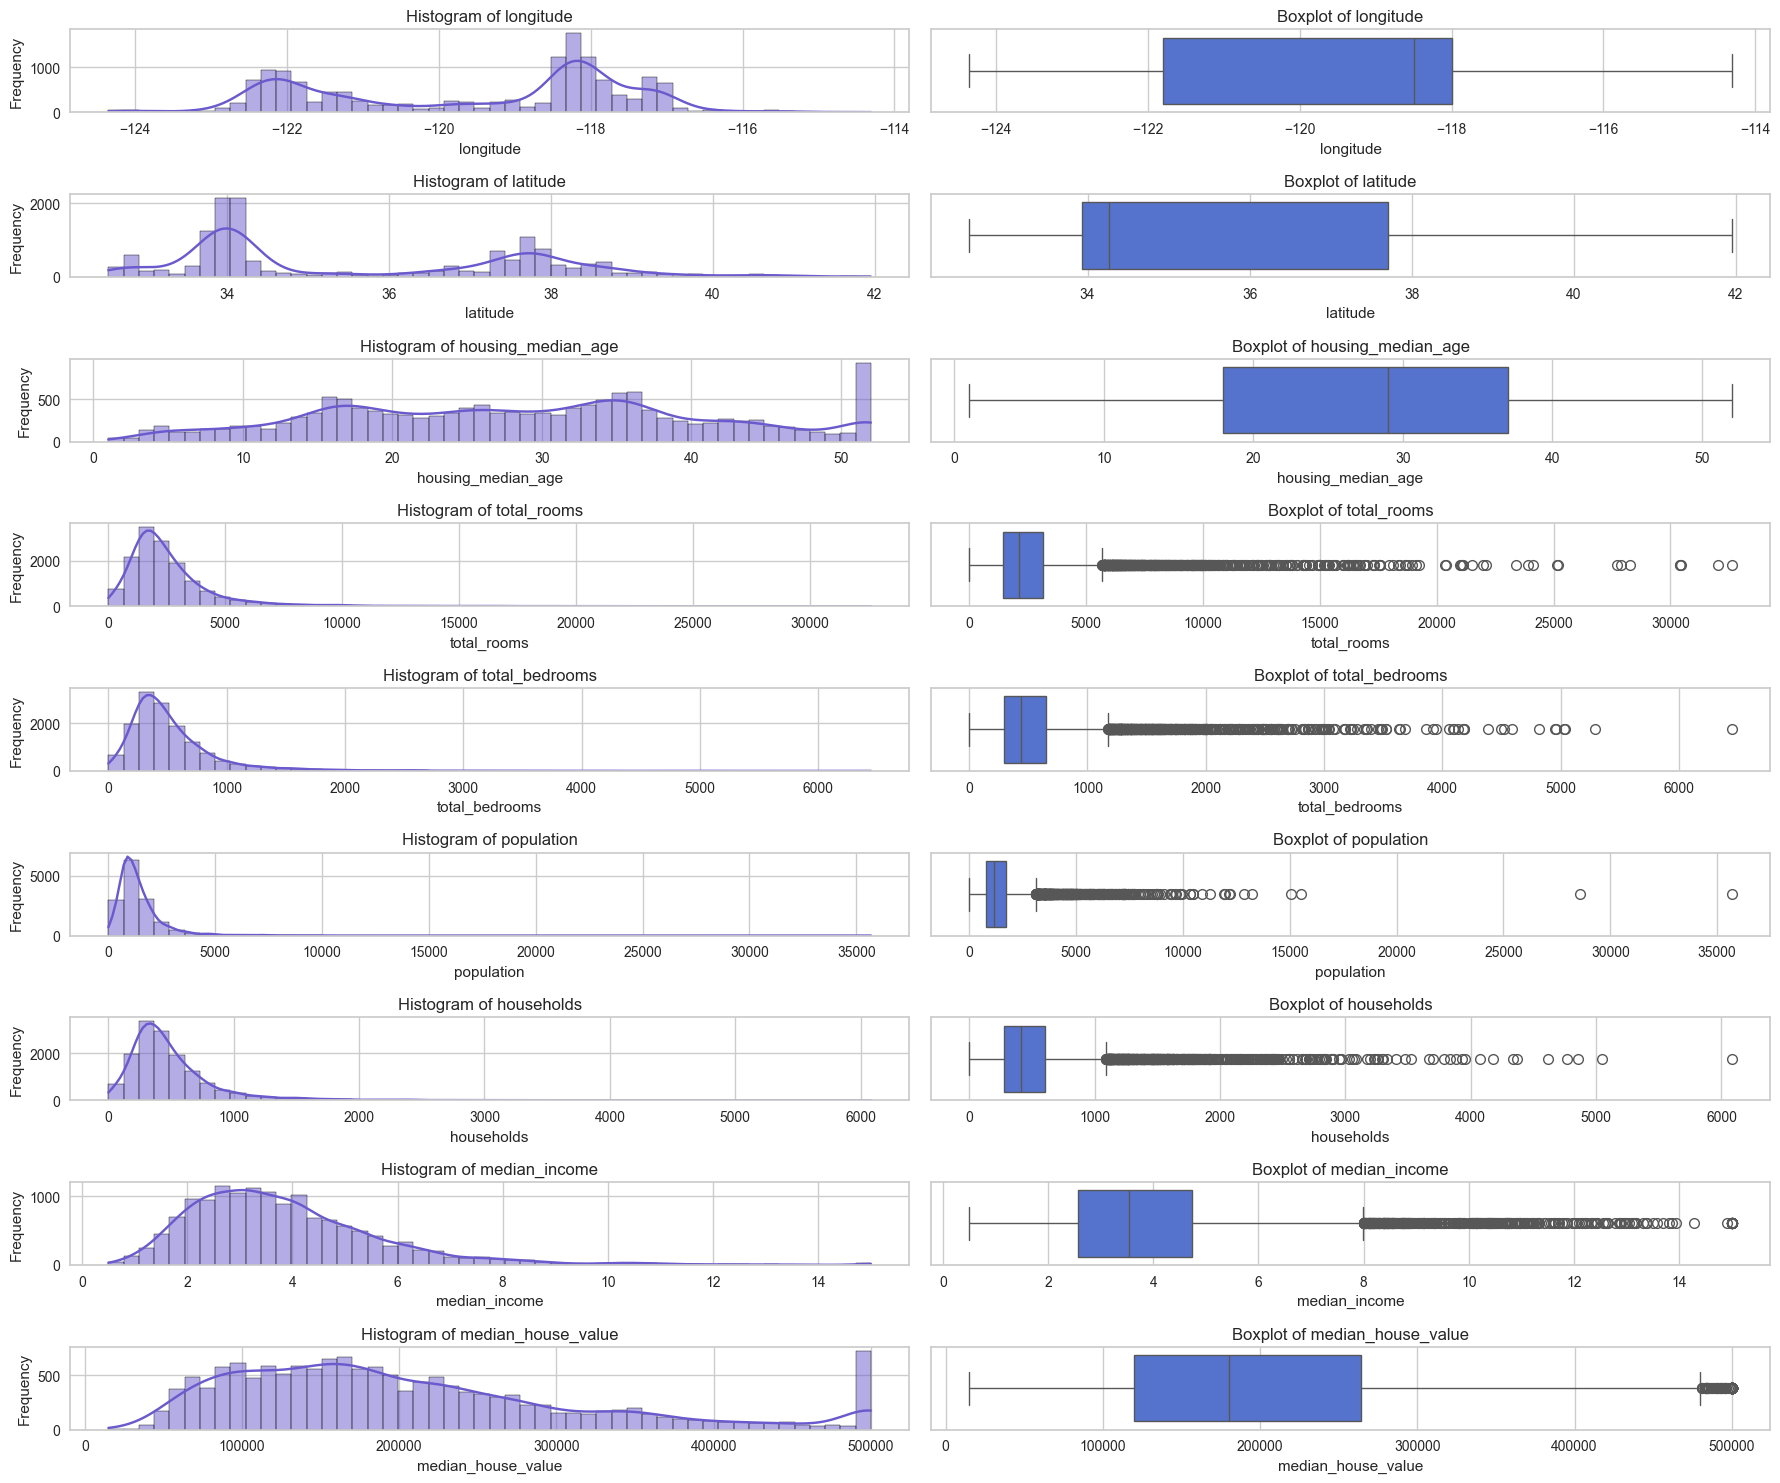

In [92]:
plt.figure(figsize=(18,15))

for index, col in enumerate(numerical_cols):
    
    # Membuat Histogram
    plt.subplot(len(numerical_cols), 2, index * 2 + 1)
    sns.histplot(df[col], kde=True, color='slateblue', bins=50)
    plt.title(f'Histogram of {col}', size=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    # Boxplot
    plt.subplot(len(numerical_cols), 2, index *2 + 2)
    sns.boxplot(x=df[col], color='royalblue')
    plt.title(f'Boxplot of {col}', size=12)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

Insight:
- Distribusi data kebanyakan `right skewed` dan memiliki nilai outlier yang esktrem

#### `Correlation Heatmap`

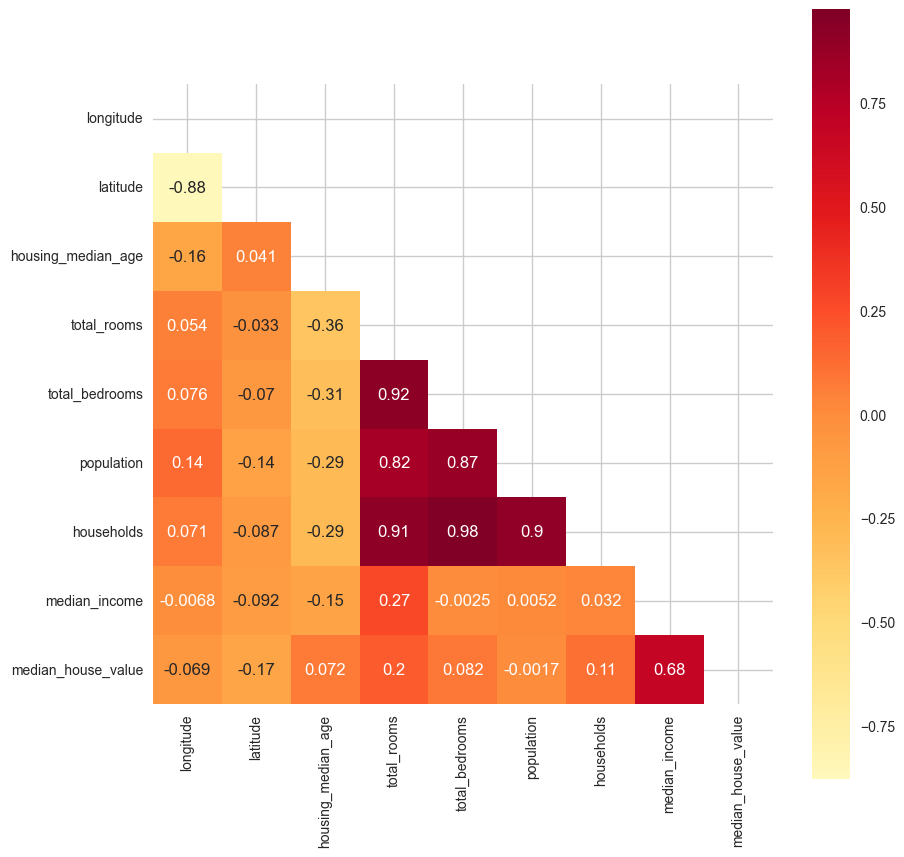

In [93]:
plt.figure(figsize=(10, 10))

matrix = np.triu(df[numerical_cols].corr(method='spearman'))
sns.heatmap(data=df[numerical_cols].corr(method='spearman'), annot=True, cmap='YlOrRd', center=0, mask=matrix, square='True')
plt.show()

Value of Correlation Coeffficient | Relationship Interpretation |
| --- | --- |
| 0.000 - 0.299 | Weak |
| 0.300 - 0.799 | Moderate |
| 0.800 - 1.000 | Strong |

Insight Korelasi ke `median_house_value`:
| Variabel             | Korelasi | Interpretasi                                                                                                             |
| -------------------- | -------- | ------------------------------------------------------------------------------------------------------------------------ |
| `median_income`      | **0.68** | 🔥 Korelasi positif sedang – semakin tinggi pendapatan, semakin tinggi nilai rumah. Merupakan prediktor paling signifikan. |
| `total_rooms`        | 0.20     | Korelasi positif lemah – lebih banyak ruangan sedikit berhubungan dengan harga rumah lebih tinggi.                       |
| `households`         | 0.11     | Korelasi positif lemah – jumlah rumah tangga sedikit berpengaruh.                                                 |
| `total_bedrooms`     | 0.082    | Korelasi lemah – tidak banyak pengaruh terhadap harga rumah.                                                      |
| `housing_median_age` | 0.072    | Korelasi lemah – rumah yang lebih tua mungkin berada di lokasi lebih strategis.                                   |
| `longitude`          | -0.069   | Korelasi negatif lemah – tidak signifikan secara praktis.                                                         |
| `latitude`           | -0.17    | ❄️ Korelasi negatif lemah – rumah lebih ke selatan (latitude lebih rendah) cenderung lebih mahal.                       |
| `population`         | -0.0017  | ⚠️ Hampir tidak ada korelasi – kepadatan penduduk tidak memengaruhi harga rumah secara linear.                           |


### B. Categorical Columns

#### `Ocean Proximity Distribution`

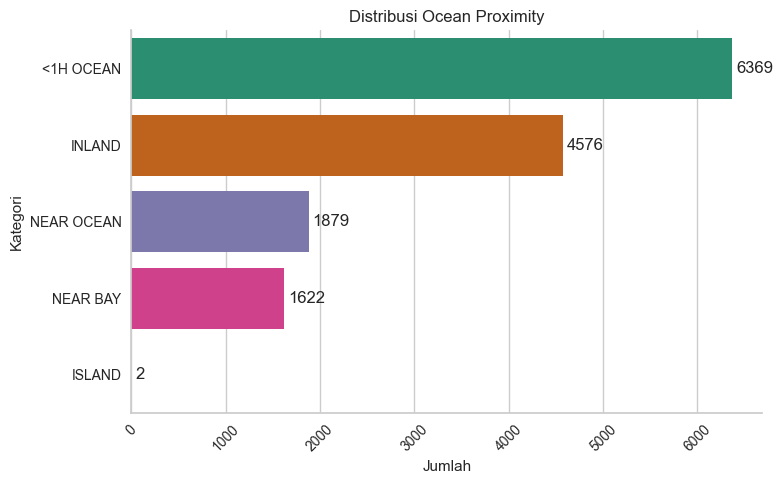

In [94]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, y='ocean_proximity', order=df['ocean_proximity'].value_counts().index, palette='Dark2')
plt.title('Distribusi Ocean Proximity')
plt.xlabel('Jumlah')
plt.ylabel('Kategori')
plt.xticks(rotation=45)
sns.despine(right=True, top=True)

# Tambahkan label angka di atas batang
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.tight_layout()
plt.show()

Insight dari Distribusi `ocean_proximity`:

- Mayoritas rumah berada dekat laut (<1H OCEAN):

    - Kategori <1H OCEAN mendominasi jumlah data, dengan 6369 rumah.
    - Ini menunjukkan bahwa sebagian besar properti berada dalam jarak tempuh kurang dari 1 jam ke pantai.

- INLAND juga merupakan lokasi yang umum:

    - Sebanyak 4576 rumah berada di area INLAND (pedalaman).
    - Ini menunjukkan distribusi signifikan rumah yang jauh dari garis pantai.

- NEAR OCEAN dan NEAR BAY lebih sedikit:

    - Hanya 1879 rumah berada dekat samudra (NEAR OCEAN), dan 1622 rumah berada dekat teluk (NEAR BAY).
    - Area-area ini mungkin lebih mahal atau terbatas dari sisi ketersediaan lahan.

- ISLAND sangat langka:

    - Hanya 2 rumah yang berada di pulau (ISLAND).
    - Bisa jadi data ini outlier, atau wilayah tersebut sangat jarang dihuni.

#### `Ocean Proximity vs Median House Value`

In [50]:
group_ocean_proximity = df.groupby('ocean_proximity')['median_house_value'].median().sort_values(ascending=False)

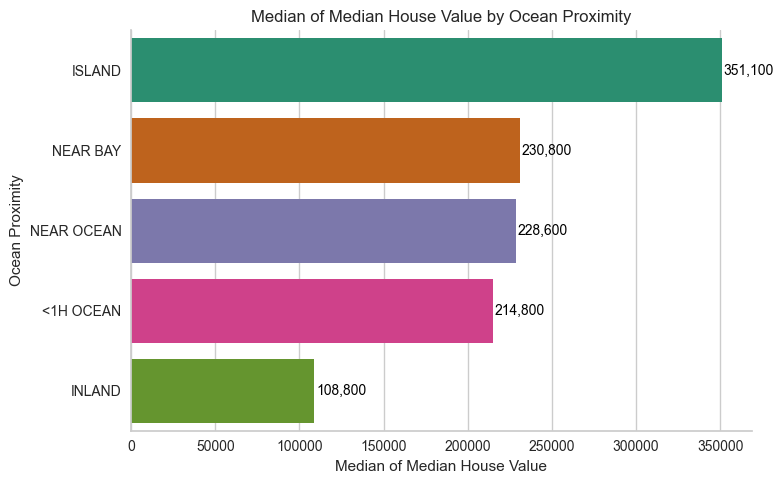

In [51]:
# Create the bar plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(y=group_ocean_proximity.index, x=group_ocean_proximity.values, palette='Dark2')

# Annotate each bar with its corresponding median house value
for i, value in enumerate(group_ocean_proximity.values):
    ax.text(value + 1000, i, f'{value:,.0f}', va='center', fontsize=10, color='black')

plt.title('Median of Median House Value by Ocean Proximity')
plt.ylabel('Ocean Proximity')
plt.xlabel('Median of Median House Value')

# Remove top and right spines
sns.despine(right=True, top=True)

plt.tight_layout()
plt.show()

Insight:
- Rumah di area ISLAND (pulau) memiliki nilai tertinggi
    - Nilai median rumah: 351.100
    - Ini adalah nilai tertinggi di antara semua kategori.
    - Menunjukkan bahwa rumah-rumah di area pulau sangat premium, mungkin karena keterbatasan lahan, keindahan alam, atau eksklusivitas.

- Rumah yang berada di dekat laut (NEAR BAY dan NEAR OCEAN) juga memiliki nilai tinggi
    - NEAR BAY: 230.800
    - NEAR OCEAN: 228.600
    - Nilainya hampir setara, menunjukkan bahwa kedekatan dengan laut atau teluk memiliki pengaruh besar terhadap nilai rumah.

- Rumah kurang dari 1 jam dari laut (<1H OCEAN) memiliki nilai lebih rendah
    - Nilai median: 214.800
    - Walaupun masih dekat dengan laut, harga lebih rendah dibandingkan yang benar-benar dekat.

- Rumah yang jauh dari laut (INLAND) memiliki nilai paling rendah
    - Nilai median: 108.800
    - Ini menunjukkan bahwa rumah di pedalaman secara signifikan lebih murah dibanding rumah yang dekat atau sangat dekat dengan laut.

## 4. Data Cleansing dan Feature Engineering

### A. Handling Missing Value

In [52]:
if total_missing > 0:
    for col, val in missing.items():
        if val > 0:
            print(f"Terdapat missing values pada kolom {col} sebesar {val} nilai atau sebesar {missing_values:.2f}%")
else:
    print("✅ Tidak ada missing values di dataset.")

Terdapat missing values pada kolom total_bedrooms sebesar 137 nilai atau sebesar 0.95%


drop missing value karena jumlahnya dibawah 1%

In [53]:
df.dropna(inplace=True)

### B. Handling Rare Values
drop `ISLAND` karena hanya terdapat dua data dan memiliki value yang sangat tinggi

In [54]:
df[['ocean_proximity']].value_counts()

ocean_proximity
<1H OCEAN          6300
INLAND             4544
NEAR OCEAN         1855
NEAR BAY           1610
ISLAND                2
Name: count, dtype: int64

In [55]:
df = df[df['ocean_proximity']!='ISLAND']

### C. New Feature

In [56]:
df['population_per_household'] = df['population']/df['households']
df['room_per_household'] = df['total_rooms']/df['households']
df['bedroom_per_household'] = df['total_bedrooms']/df['households']

### D. Remove Irrelative Feature

In [57]:
df.drop(columns=[
    'population',
    'total_rooms',
    'total_bedrooms',
    'households',
], inplace=True)

### E. Checking Outlier After Generating New Feature

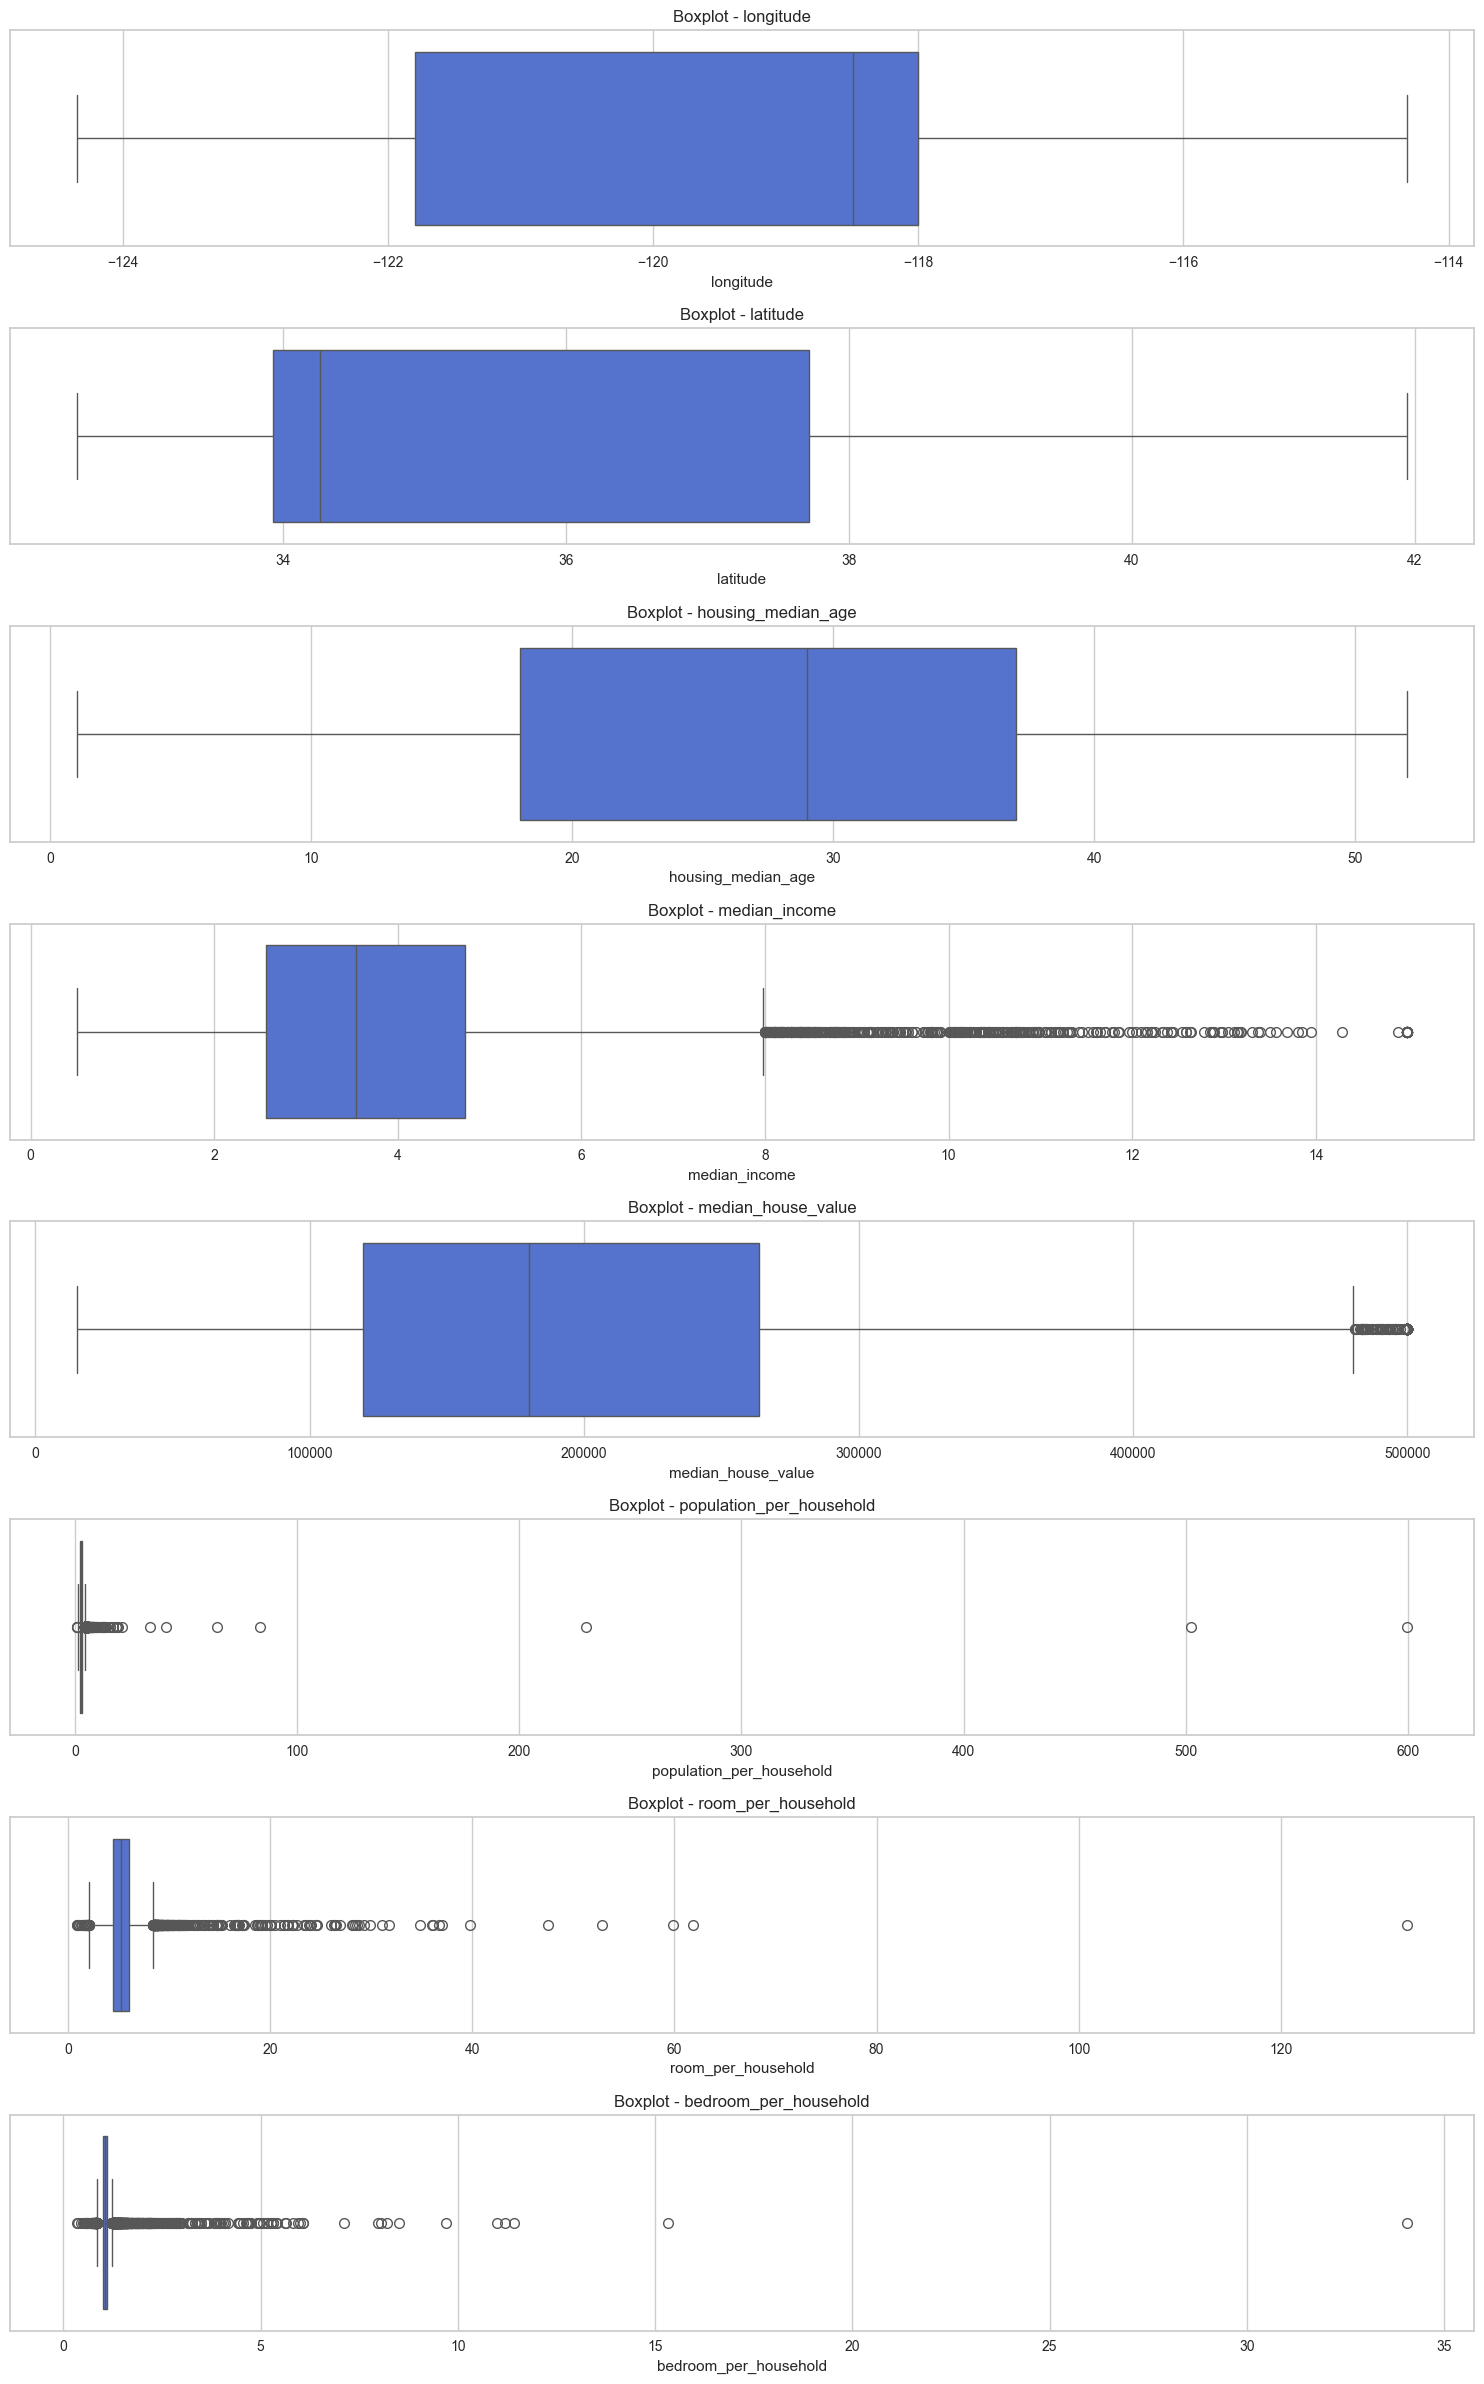

In [58]:
# Identifikasi kolom numerikal
numerical_columns = df.select_dtypes(include=['float64']).columns

# Boxplots untuk semua kolom numerik
plt.figure(figsize=(15, len(numerical_columns) * 3))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.boxplot(data=df, x=col, color='royalblue')
    plt.title(f'Boxplot - {col}')
plt.tight_layout()
plt.show()

### F. Handling Outlier

In [59]:
# Daftar kolom yang akan dibersihkan dari outlier
columns_to_clean = ['median_income', 'median_house_value','population_per_household', 'room_per_household', 'bedroom_per_household']

for col in columns_to_clean:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out outlier
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Cek hasil
print("Ukuran data setelah outlier dihapus:", df.shape)

Ukuran data setelah outlier dihapus: (11892, 9)


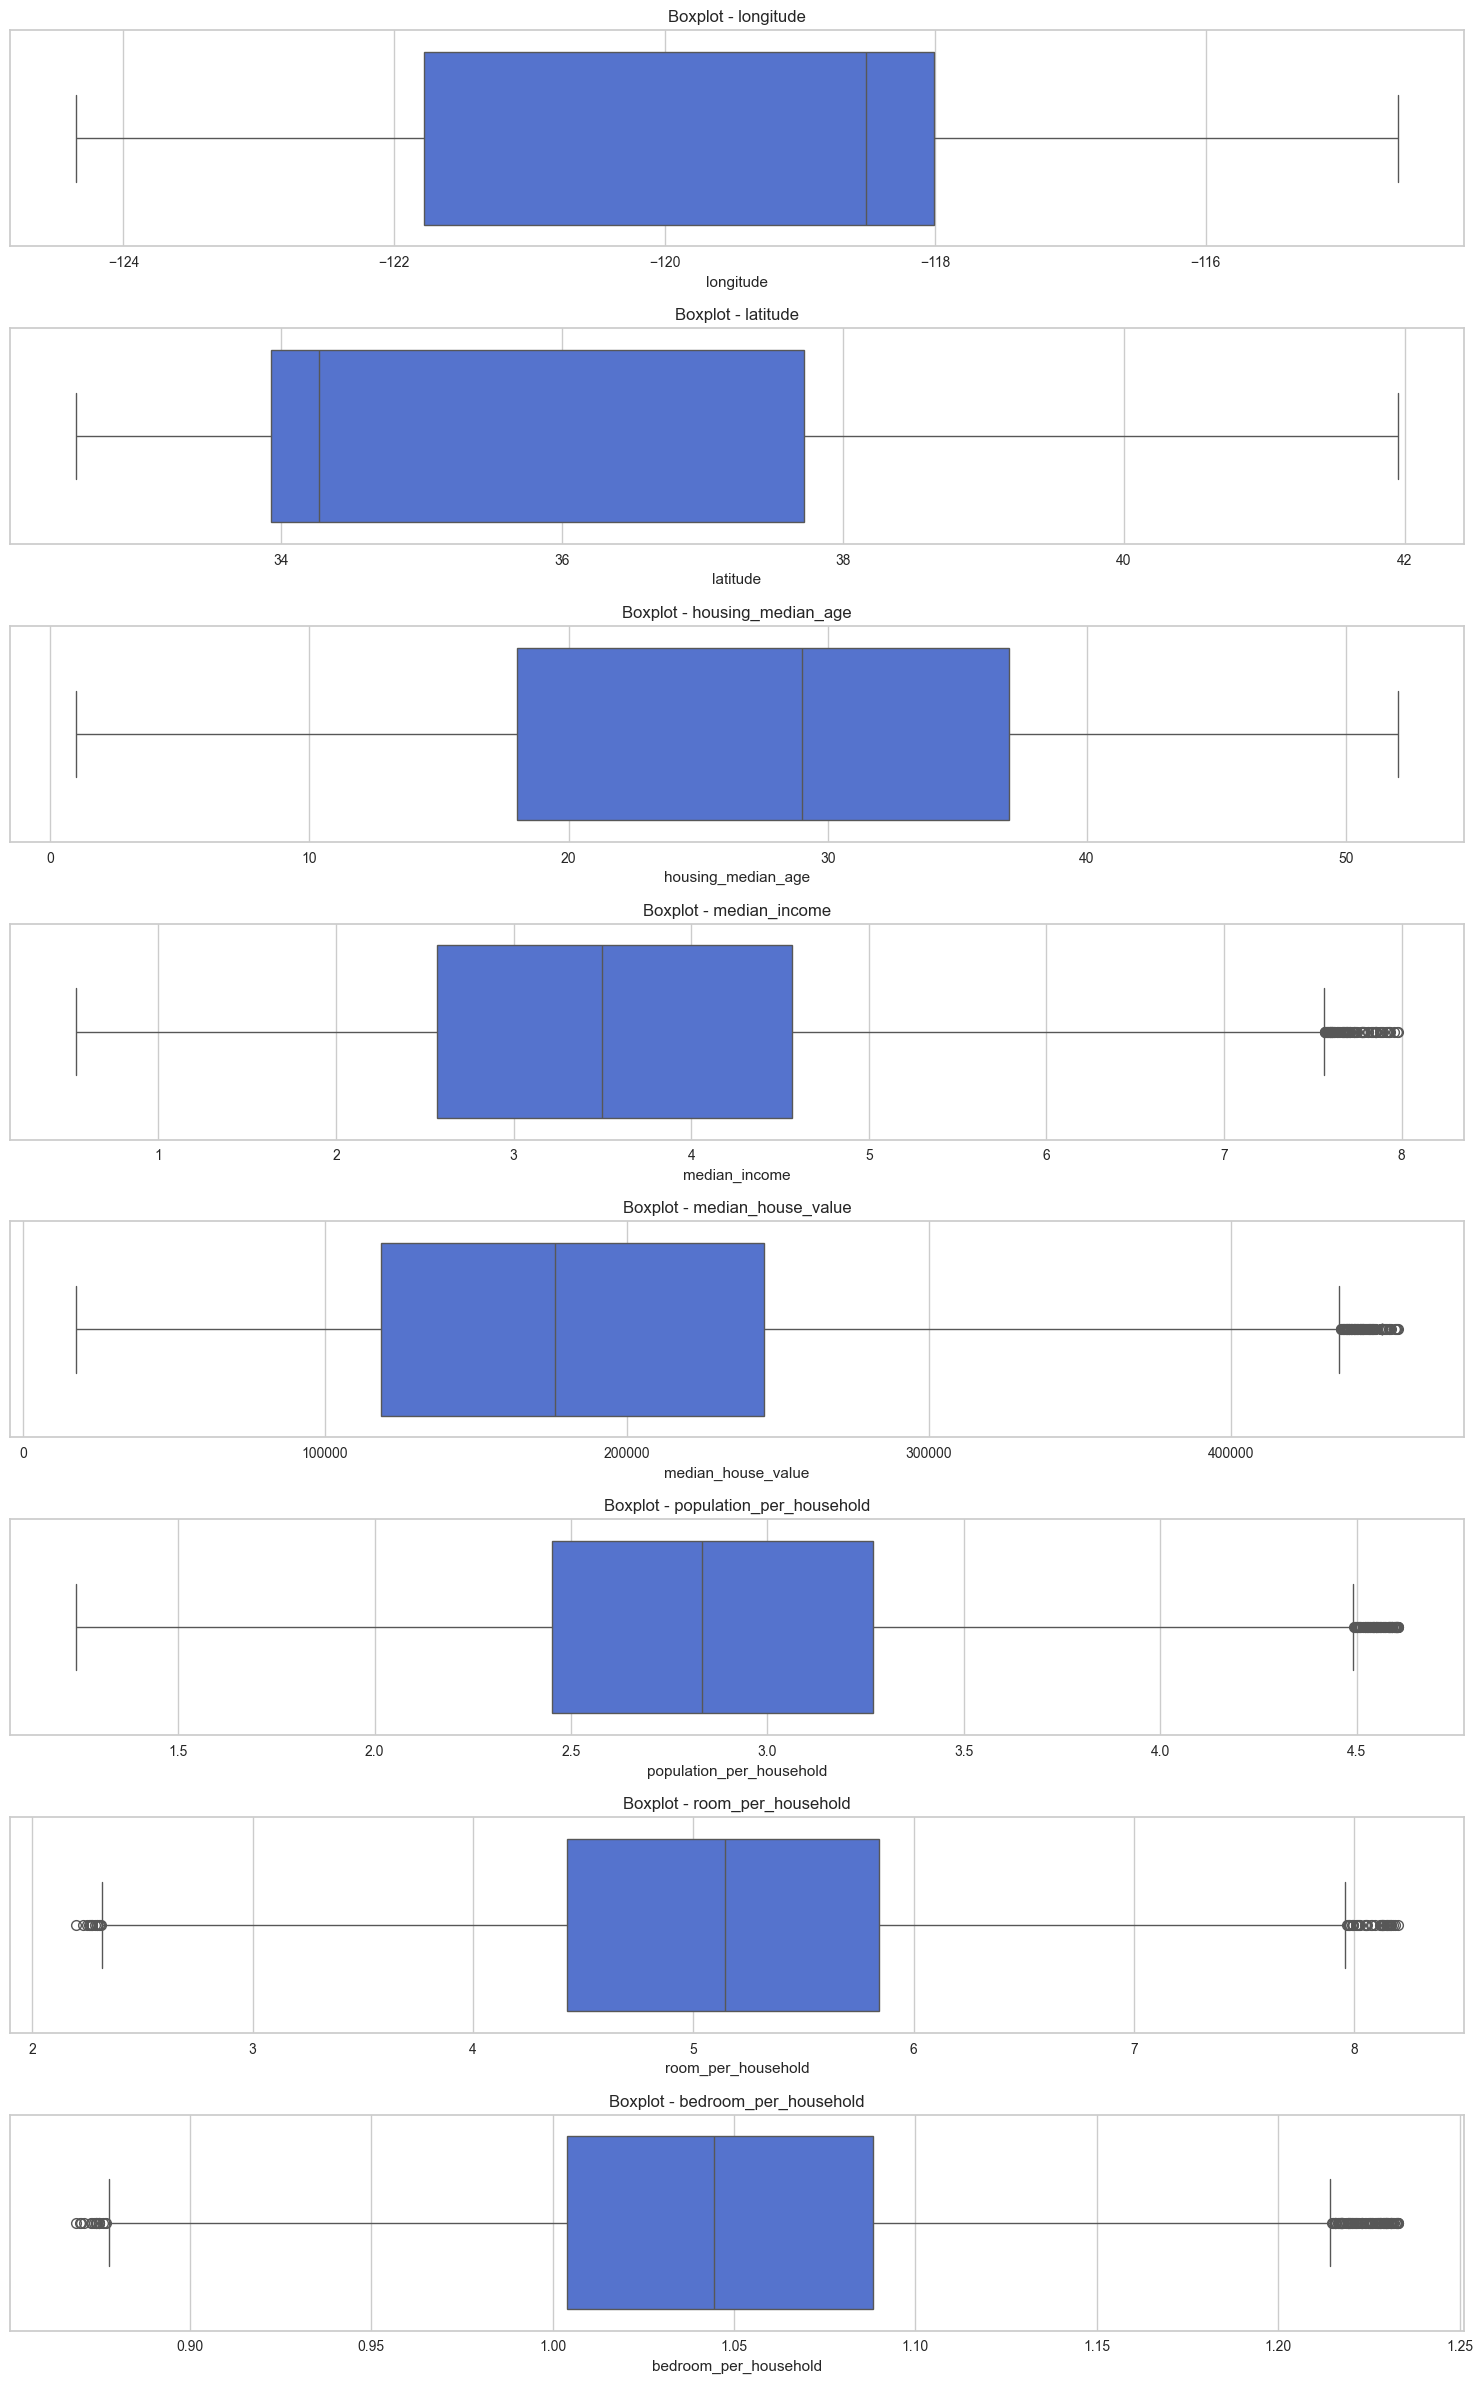

In [60]:
# Identifikasi kolom numerikal
numerical_columns = df.select_dtypes(include=['float64']).columns

# Boxplots untuk semua kolom numerik
plt.figure(figsize=(15, len(numerical_columns) * 3))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.boxplot(data=df, x=col, color='royalblue')
    plt.title(f'Boxplot - {col}')
plt.tight_layout()
plt.show()

## 5. Pre-Processing

Pada tahapan pre-processing terdapat 3 langkah yang akan dilakukan yaitu:
- Define X dan y
- Train Test Split
- Encoding dan Scaling

### A. Define X and y
Memisahkan antara `target` dan `feature`. kolom `median_house_value` menjadi `target` dan kolom lainnya menjadi `feature`

In [61]:
# Define Features
X = df.drop(columns='median_house_value') 

# Define Target
y = df['median_house_value']

### B. Train Test Split
Memisahkan `Train` dan `Test` dengan membagi proporsi 80:20 dan menggunakan `random_state` 20

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

### C. Encoding and Scaling
- Definisi:
    - Encoding merupakan proses mengubah data kategorikal menjadi bentuk numerik yang dapat diproses oleh algoritma machine learning.
    - Scaling merupakan proses menstandarisasi rentang nilai fitur numerik untuk memastikan semua fitur berkontribusi secara adil dalam model machine learning
- Encoding:
    - OneHotEncoder adalah teknik encoding untuk mengubah data kategorikal menjadi bentuk numerik biner (0 dan 1). Setiap kategori unik diubah menjadi kolom tersendiri, dan nilai pada kolom tersebut diisi dengan 1 jika cocok, dan 0 jika tidak.
    - Kolom yang di encoding adalah `ocean_proximity`
- Scaling:
    - Robust Scaler (menggunakan median & IQR) lebih tahan terhadap outlier dibanding Min-Max atau Standard Scaler, cocok untuk data yang sering memiliki skewness
    - Kolom yang di scaling adalah `longitude`, `latitude`, `housing_median_age`, `median_income`, `population_per_household`, `room_per_household`, `bedroom_per_household`

In [63]:
transformer = ColumnTransformer([('onehot', OneHotEncoder(drop='first'), ['ocean_proximity']), 
                   ('rbscaler', RobustScaler(), 
                    ['longitude', 'latitude', 'housing_median_age', 'median_income', 
                     'population_per_household', 'room_per_household', 'bedroom_per_household'])], 
                  remainder = 'passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['ocean_proximity']),
                                ('rbscaler', RobustScaler(),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'median_income', 'population_per_household',
                                  'room_per_household',
                                  'bedroom_per_household'])])

## 6. Modeling

### A. Define Models

In [64]:
lin_reg = LinearRegression()
ridge = Ridge()
lasso = Lasso()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
xgb = XGBRegressor()
gbr = GradientBoostingRegressor()
ada = AdaBoostRegressor()

### B. Benchmarking Models

In [65]:
### Benchmarking Model
model = [lin_reg, ridge, lasso, knn, dt, rf, xgb, gbr, ada]
model_names = ['Linear Regression', 'Ridge', 'Lasso', 'KNN', 'Decision Tree', 'Random Forest', 'XG Boost', 'Gradient Boosting', 'AdaBoost']

# metrics
list_scorer = ['neg_root_mean_squared_error', 'neg_mean_absolute_percentage_error', 'neg_mean_absolute_error']

# list
list_mean_rmse = []
list_mean_mae = []
list_mean_mape = []

list_std_rmse = []
list_std_mae = []
list_std_mape = []

list_all = []

# looping model dengan pipeline dan cross validation
for i in model:
    # pipeline
    pipe_prep_model = Pipeline([
        ('preprocessing', transformer),
        ('model', i)
        ])
    crossval = cross_validate(pipe_prep_model, 
                              X_train,
                              y_train,
                              cv = 5,
                              scoring = list_scorer
                              )
    list_all.append(crossval)
    list_mean_rmse.append(crossval['test_neg_root_mean_squared_error'].mean())
    list_mean_mape.append(crossval['test_neg_mean_absolute_percentage_error'].mean())
    list_mean_mae.append (crossval['test_neg_mean_absolute_error'].mean())

    list_std_rmse.append(crossval['test_neg_root_mean_squared_error'].std())
    list_std_mape.append(crossval['test_neg_mean_absolute_percentage_error'].std())
    list_std_mae.append (crossval['test_neg_mean_absolute_error'].std())

df_model_cv = pd.DataFrame()
df_model_cv['Model'] = model_names
df_model_cv['Mean_RMSE'] = list_mean_rmse
df_model_cv['STD_RMSE'] = list_std_rmse
df_model_cv['Mean_MAPE'] = list_mean_mape
df_model_cv['STD_MAPE'] = list_std_mape
df_model_cv["Mean_MAE"] = list_mean_mae
df_model_cv["STD_MAE"] = list_std_mae
df_model_cv['Mean_RMSE'] = np.abs(df_model_cv['Mean_RMSE'])
df_model_cv['STD_RMSE'] = np.abs(df_model_cv['STD_RMSE'])
df_model_cv['Mean_MAPE'] = np.abs(df_model_cv['Mean_MAPE'])
df_model_cv['STD_MAPE'] = np.abs(df_model_cv['STD_MAPE'])
df_model_cv["Mean_MAE"] = np.abs(df_model_cv['Mean_MAE'])
df_model_cv["STD_MAE"] = np.abs(df_model_cv['STD_MAE'])
df_model_cv = df_model_cv.sort_values(by="Mean_MAPE", ascending=True)

df_model_cv

,Model,Mean_RMSE,STD_RMSE,Mean_MAPE,STD_MAPE,Mean_MAE,STD_MAE
6,XG Boost,40529.035059,1112.457322,0.162136,0.007292,27901.887705,902.814137
5,Random Forest,42920.093593,1024.302626,0.171811,0.006224,29554.389296,706.750635
7,Gradient Boosting,44642.079986,947.142318,0.188429,0.004617,31977.827265,521.497085
3,KNN,51619.454264,1434.067730,0.213555,0.007736,36723.998234,856.845118
4,Decision Tree,60481.026606,889.865117,0.229978,0.006849,40691.744531,535.634013
1,Ridge,54126.256690,905.796745,0.255147,0.005800,40926.325990,521.967545
2,Lasso,54125.806883,902.389298,0.255323,0.005748,40933.799397,517.827435
0,Linear Regression,54125.797790,902.213131,0.255337,0.005745,40934.419854,517.555533
8,AdaBoost,66200.519603,1673.970382,0.397330,0.016460,55656.152127,1801.088330


Evaluasi Model: RMSE, MAE, dan MAPE

1. **RMSE (Root Mean Squared Error)**

Pengertian : RMSE adalah akar dari rata-rata kuadrat selisih antara nilai aktual dan nilai prediksi.

Rumus:

`RMSE = √( (1/n) * Σ(yᵢ - ŷᵢ)²)`

Keterangan:
- Mengukur besar kesalahan dalam satuan yang sama dengan data.
- Lebih sensitif terhadap kesalahan besar (outlier).

---

2. **MAE (Mean Absolute Error)**

Pengertian : MAE adalah rata-rata dari nilai absolut selisih antara nilai aktual dan nilai prediksi.

Rumus:

`MAE = (1/n) * Σ|yᵢ - ŷᵢ|`

Keterangan:
- Memberikan gambaran seberapa jauh prediksi dari nilai sebenarnya.
- Tidak terlalu dipengaruhi oleh outlier.

---

3. **MAPE (Mean Absolute Percentage Error)**

Pengertian : MAPE adalah rata-rata dari persentase kesalahan absolut terhadap nilai aktual.

Rumus:

`MAPE = (100/n) * Σ(|yᵢ - ŷᵢ| / |yᵢ|)`

Keterangan:
- Mengukur kesalahan dalam bentuk persentase.
- Tidak cocok jika ada nilai aktual = 0 (karena pembagian dengan nol).

In [66]:
df_train = df_model_cv.head(3)
df_train.drop(columns=['STD_RMSE', 'STD_MAPE', 'STD_MAE'], inplace=True)
df_train

,Model,Mean_RMSE,Mean_MAPE,Mean_MAE
6,XG Boost,40529.035059,0.162136,27901.887705
5,Random Forest,42920.093593,0.171811,29554.389296
7,Gradient Boosting,44642.079986,0.188429,31977.827265


Memilih XG Boost sebagai model yang akan digunakan untuk hyperparameter tuning

Alasan:
- Memiliki nilai RMSE terendah dibandingkan model lainnya
- Memiliki nilai MAPE terendah, menunjukkan kesalahan prediksi relatif yang paling kecil
- Memiliki nilai MAE terendah, menunjukkan rata-rata kesalahan absolut yang paling kecil

## 7. Hyperparameter Tuning

### A. XG Boost Explanation

XGBoost (Extreme Gradient Boosting)

Pengertian
XGBoost adalah singkatan dari Extreme Gradient Boosting, yaitu sebuah algoritma machine learning berbasis pohon keputusan (decision tree) yang mengimplementasikan teknik boosting secara efisien dan teroptimasi. XGBoost dikembangkan untuk meningkatkan performa baik dalam hal akurasi maupun kecepatan.

Karakteristik Utama
- Gradient Boosting: Menggabungkan banyak model decision tree lemah (weak learners) menjadi satu model kuat secara iteratif dengan meminimalkan kesalahan (loss function).
- Regularization: Memiliki fitur regulasi (L1 dan L2) untuk mencegah overfitting.
- Parallel Processing: Mendukung eksekusi paralel sehingga lebih cepat dibandingkan metode boosting tradisional.
- Handling Missing Values: Dapat menangani nilai hilang secara otomatis.
- Tree Pruning: Menggunakan pruning "max_depth" daripada metode tradisional pre-pruning untuk hasil yang lebih optimal.

Kelebihan
- Sangat cepat dan efisien.
- Mendukung distributed computing.
- Akurasi tinggi.
- Cocok untuk data berukuran besar.
- Mendukung berbagai jenis input: numerik, kategorikal (dengan encoding), dan nilai hilang.

Kekurangan
- Lebih kompleks dibandingkan algoritma pohon sederhana.
- Perlu tuning hyperparameter yang tepat untuk performa maksimal.
- Rentan terhadap overfitting jika tidak ditangani dengan baik.

Komponen Penting
- Objective Function: Fungsi yang ingin diminimalkan (misalnya MSE, log loss).
- Loss Function: Mengukur kesalahan prediksi.
- Regularization Term: Mengontrol kompleksitas model.
- Tree Structure: Struktur dari decision tree yang dibentuk pada setiap iterasi.
- Learning Rate (`eta`): Mengontrol kontribusi setiap pohon baru.

### B. Hyperparameter Tuning

In [67]:
pipe_XGBRegressor = Pipeline([
    ('preprocessing', transformer),
    ('model', XGBRegressor(objective='reg:squarederror', random_state=20))
])

# Parameter grid
param_grid = {
    'model__n_estimators': [100, 200],            # jumlah pohon boosting yang cukup untuk eksplorasi awal
    'model__max_depth': [3,5],                    # kedalaman pohon yang umum dan efektif
    'model__learning_rate': [0.1, 0.2],           # learning rate sedang
    'model__subsample': [0.8, 1.0],                 # sedikit variasi untuk menghindari overfitting
    'model__colsample_bytree': [0.8, 1.0],          # variasi fitur yang digunakan
    'model__min_child_weight': [1, 3],              # kontrol kompleksita s dasar
    'model__gamma': [0, 0.1],                        # regularisasi ringan
    'model__reg_alpha': [0, 0.1],                    # L1 regularisasi ringan
    'model__reg_lambda': [1, 1.5]                    # L2 regularisasi ringan
}

# Grid search
grid_search = GridSearchCV(
    pipe_XGBRegressor,
    param_grid,
    cv=5,
    scoring='neg_mean_absolute_percentage_error',
    n_jobs=-1,
)

# Fit model
grid_search.fit(X_train, y_train)

# Output hasil terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best Mape Score:", -grid_search.best_score_)

Best Parameters: {'model__colsample_bytree': 1.0, 'model__gamma': 0, 'model__learning_rate': 0.2, 'model__max_depth': 5, 'model__min_child_weight': 3, 'model__n_estimators': 200, 'model__reg_alpha': 0, 'model__reg_lambda': 1.5, 'model__subsample': 1.0}
Best Mape Score: 0.15631077995214726


Setelah melakukan hyperparameter tuning, model XG Boost mendapatkan parameter terbaik yaitu:
- `model__n_estimators`: 200
- `model__max_depth`: 5
- `model__learning_rate`: 0.2
- `model__subsample`: 1
- `model__colsample_bytree`:1.0
- `model__min_child_weight`:1
- `model__gamma`: 0
- `model__reg_alpha`: 0
- `model__reg_lambda`: 1

### C. Tuning Using Best Parameter

In [68]:
pipe_XGBRegressor = Pipeline([
    ('preprocessing', transformer),
    ('model', XGBRegressor(random_state=20))
])

# Parameter grid
param_grid = {
    'model__n_estimators': [200],            # jumlah pohon boosting yang cukup untuk eksplorasi awal
    'model__max_depth': [5],                    # kedalaman pohon yang umum dan efektif
    'model__learning_rate': [0.2],           # learning rate sedang
    'model__subsample': [1],                 # sedikit variasi untuk menghindari overfitting
    'model__colsample_bytree':[1.0],          # variasi fitur yang digunakan
    'model__min_child_weight':[1],              # kontrol kompleksita s dasar
    'model__gamma': [0],                        # regularisasi ringan
    'model__reg_alpha': [0],                    # L1 regularisasi ringan
    'model__reg_lambda': [1]                  # L2 regularisasi ringan
}

# Grid search
grid_search = GridSearchCV(
    pipe_XGBRegressor,
    param_grid,
    cv=5,
    scoring='neg_mean_absolute_percentage_error',
    n_jobs=-1,
    verbose=1
)

# Fit model
grid_search.fit(X_train, y_train)

# Output hasil terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best Mape Score:", -grid_search.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters: {'model__colsample_bytree': 1.0, 'model__gamma': 0, 'model__learning_rate': 0.2, 'model__max_depth': 5, 'model__min_child_weight': 1, 'model__n_estimators': 200, 'model__reg_alpha': 0, 'model__reg_lambda': 1, 'model__subsample': 1}
Best Mape Score: 0.15784555340565648


### D. Comparison Before and After Tuning

In [69]:
# Before Tuning
pipe_prep_model = Pipeline([
    ('preprocessing', transformer),
    ('modeling', XGBRegressor(random_state=20))
])
# Fit pada data mentah (X_train)
pipe_prep_model.fit(X_train, y_train)

# Predict pada data mentah (X_test)
y_pred_before = pipe_prep_model.predict(X_test)

# MAPE Score
mape_before = mean_absolute_percentage_error(y_test, y_pred_before)

# Hitung RMSE
rmse_before = np.sqrt(mean_squared_error(y_test, y_pred_before))

# Hitung MAE
mae_before = mean_absolute_error(y_test, y_pred_before)

print(f"MAPE: {mape_before:.6f}")
print(f"RMSE: {rmse_before:.6f}")
print(f"MAE: {mae_before:.6f}")

MAPE: 0.159406
RMSE: 41307.338850
MAE: 27640.225142


In [70]:
#After Tuning
best_model = grid_search.best_estimator_

# fitting
best_model.fit(X_train, y_train)

# predict
y_pred_best = best_model.predict(X_test)

# MAPE Score
mape_after = mean_absolute_percentage_error(y_test, y_pred_best)

# Hitung RMSE
rmse_after = np.sqrt(mean_squared_error(y_test, y_pred_best))

# Hitung MAE
mae_after = mean_absolute_error(y_test, y_pred_best)

print(f"MAPE: {mape_after:.6f}")
print(f"RMSE: {rmse_after:.6f}")
print(f"MAE: {mae_after:.6f}")

MAPE: 0.158853
RMSE: 40667.973126
MAE: 27292.801428


In [71]:
df_compare = pd.DataFrame()
df_compare['Model'] = ['Before Tuning', 'After Tuning']
df_compare['MAPE'] = [mape_before, mape_after]
df_compare['RMSE'] = [rmse_before, rmse_after]
df_compare['MAE'] = [mae_before, mae_after]
df_compare

,Model,MAPE,RMSE,MAE
0,Before Tuning,0.159406,41307.338850,27640.225142
1,After Tuning,0.158853,40667.973126,27292.801428


Insight:
- Setelah tuning, model menunjukkan peningkatan performa di semua metrik evaluasi:
  - MAPE turun dari `0.159406` menjadi `0.158853` → sedikit peningkatan akurasi relatif.
  - RMSE berkurang dari `41,307` menjadi `40,668` → model lebih stabil terhadap prediksi ekstrem.
  - MAE turun dari `27,640` menjadi `27,293` → prediksi menjadi sedikit lebih dekat ke nilai aktual secara umum.

### E. Learning Curve

Learning Curve adalah grafik yang menggambarkan performa model terhadap data latih dan data validasi seiring bertambahnya jumlah data pelatihan atau jumlah iterasi (epoch).

Komponen Grafik:
- Sumbu X: Ukuran data pelatihan atau jumlah iterasi (epoch)
- Sumbu Y: Error (seperti RMSE, MAE) atau skor akurasi

Tujuan Learning Curve:
- Mengevaluasi apakah model underfitting, overfitting, atau fit dengan baik
- Menentukan apakah menambah data atau melatih lebih lama akan meningkatkan performa

Interpretasi Umum:
- Underfitting: Training dan validation error sama-sama tinggi → Model terlalu sederhana
- Overfitting: Training error rendah tapi validation error tinggi → Model terlalu kompleks
- Good Fit: Training dan validation error sama-sama rendah dan saling mendekati

Kegunaan:
- Membantu dalam diagnosis performa model
- Menentukan apakah perlu menambah data atau mengubah kompleksitas model
- Mengarahkan proses tuning model secara lebih efektif

Dengan melihat learning curve, kita bisa tahu apakah masalah ada pada model, data, atau training process.


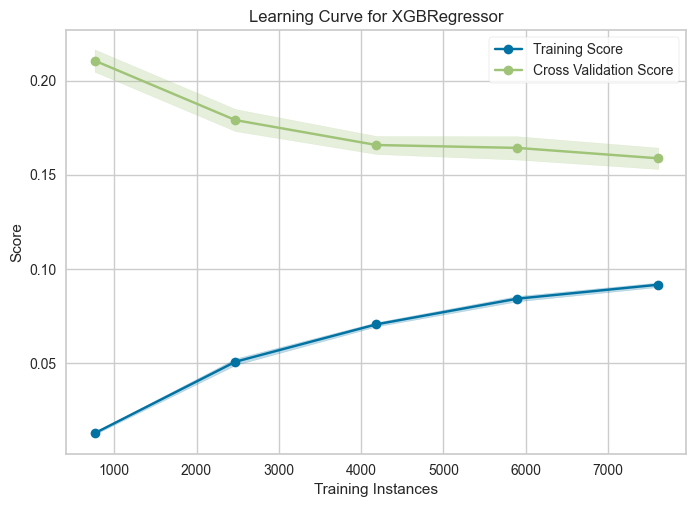

<Axes: title={'center': 'Learning Curve for XGBRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [72]:
kurva = LearningCurve(best_model, scoring=make_scorer(mean_absolute_percentage_error))
kurva.fit(X_train, y_train)
kurva.ax.set_title("MAPE For XG Boost Regressor")
kurva.show()

Insight:

- Training Score (Garis Biru):

    - Awalnya sangat rendah (mendekati nol) → model sangat cocok dengan data pelatihan kecil.
    - Nilai training error naik seiring bertambahnya data → model kesulitan mempelajari semua data dengan baik.
    - Namun, tetap membaik (lebih rendah) secara perlahan saat data bertambah.

- Cross Validation Score (Garis Hijau):

    - Menurun drastis dari awal (artinya performa meningkat dengan lebih banyak data).
    - Setelah sekitar 4000-6000 data, perbaikannya mulai stagnan → indikasi diminishing returns (penambahan data tidak banyak meningkatkan akurasi).

- Gap antara training dan validation score:

    - Gap cukup besar, tapi semakin sempit dengan bertambahnya data.
    - Ini menunjukkan overfitting saat data masih sedikit, tapi menjadi lebih baik (berkurang overfitting) dengan lebih banyak data.

### F. Residual Plot

Residual Plot adalah grafik yang menunjukkan selisih antara nilai aktual dan nilai prediksi (disebut residual) terhadap nilai prediksi. 

`Residual = Actual - Predicted`

- Sumbu X: Nilai prediksi dari model
- Sumbu Y: Nilai residual (error)

Interpretasi:
- Titik-titik yang tersebar secara acak dan merata di sekitar garis nol horizontal menunjukkan bahwa model memiliki performa yang baik dan tidak mengalami pola error tertentu (homoskedastisitas).
- Jika ada pola tertentu (misalnya membentuk kurva), itu mengindikasikan adanya masalah pada model seperti:
  - Underfitting atau overfitting
  - Error yang tidak menyebar secara merata (heteroskedastisitas)

Tujuan utama residual plot adalah untuk:
- Menilai kecocokan model
- Mengecek apakah asumsi linearitas dan variansi konstan terpenuhi
- Mendeteksi outlier atau pola kesalahan

Semakin acak dan tersebar simetris residual terhadap garis nol, semakin baik model dalam menangkap pola data.


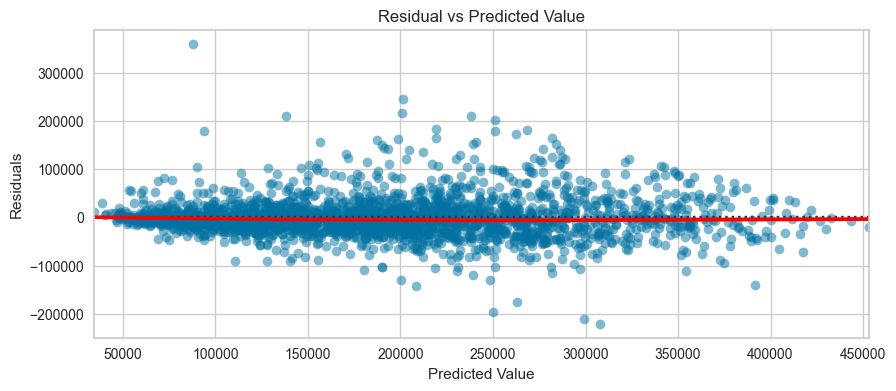

In [73]:
# Calculate residuals
residuals = y_test - y_pred_best

# Create residual plot
plt.figure(figsize=(10, 4))
plot = sns.residplot(
    x=y_pred_best,
    y=residuals,
    lowess=True,                           
    scatter_kws={'alpha': 0.5},
    line_kws={'color':'red'}             
)

plot.set_title('Residual vs Predicted Value')
plot.set_xlabel('Predicted Value')
plot.set_ylabel('Residuals')

plt.show()

Insight:

- Distribusi Residual Terpusat di Sekitar 0:
  - Sebagian besar titik residual mengelompok di sekitar garis horizontal merah (residual = 0).
  - Ini menandakan bahwa model secara umum tidak bias secara sistematis (underfit atau overfit secara ekstrem).

- Pola Residual Acak:
  - Tidak terlihat pola tertentu (misalnya bentuk U atau V), yang berarti model cukup baik dalam menangkap struktur data.
  - Pola acak menunjukkan bahwa asumsi homoskedastisitas (varian residual konstan) kurang lebih terpenuhi.

- Sedikit Heteroskedastisitas:
  - Terlihat bahwa variansi residual sedikit lebih besar pada nilai prediksi yang rendah dibandingkan yang tinggi.
  - Ini mengindikasikan adanya sedikit heteroskedastisitas, tapi masih dalam batas wajar.

- Beberapa Outlier:
  - Ada beberapa titik residual ekstrim (> ±200.000), yang mungkin merupakan outlier.
  - Outlier ini bisa berdampak pada performa model, dan mungkin perlu diperiksa lebih lanjut.

- Kesimpulan:

    - Model menunjukkan performa yang stabil dan tidak bias.
    - Tidak ada pola sistematis pada residual, mendukung bahwa model cukup baik.
    - Perlu diwaspadai sedikit heteroskedastisitas dan outlier ekstrem.

### G. Actual vs Prediction

Grafik Actual vs Prediction membandingkan nilai hasil prediksi model dengan nilai aktual (ground truth). Setiap titik mewakili satu observasi, di mana sumbu X menunjukkan nilai prediksi dan sumbu Y menunjukkan nilai aktual.

Interpretasi:
- Titik-titik yang berada dekat dengan garis merah (garis diagonal) menunjukkan bahwa prediksi model sangat akurat.
- Penyebaran yang sempit dan mendekati garis menandakan model memiliki performa yang baik.
- Penyimpangan besar dari garis diagonal mengindikasikan adanya kesalahan prediksi.

Grafik ini sangat bermanfaat untuk:
- Mengevaluasi **akurasi model secara visual**.
- Mengidentifikasi **outlier atau error besar**.
- Memastikan tidak ada pola sistematik pada kesalahan prediksi.

Semakin rapat titik-titik terhadap garis diagonal, semakin baik performa model prediksi.


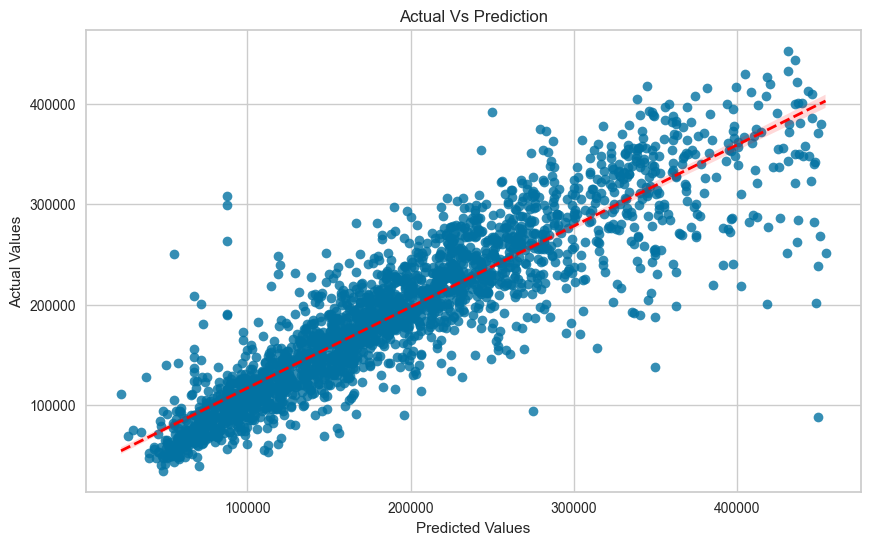

In [78]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.regplot(x=y_test, y=y_pred_best, ax=ax, line_kws={'color':'red', 'lw':2, 'alpha':1, 'ls':'--'})

ax.set_title('Actual Vs Prediction')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')

plt.show()

Insight:

- Distribusi Titik Dekat Garis Merah (y = x):
  - Titik-titik banyak berjejer di sekitar garis merah putus-putus (garis ideal di mana prediksi = aktual).
  - Ini menunjukkan bahwa model memiliki akurasi yang baik, karena prediksi mendekati nilai sesungguhnya.

- Pola Linear yang Jelas:
  - Sebagian besar titik membentuk pola linear positif → model dapat menangkap tren harga secara umum.

- Sebaran Residual Lebih Besar pada Nilai Tinggi:
  - Pada nilai yang lebih tinggi (di atas 300,000), titik-titik mulai menyebar lebih luas dari garis.
  - Ini menunjukkan bahwa model kurang presisi dalam memprediksi nilai rumah yang mahal.

- Sedikit Outlier:
  - Ada beberapa titik yang jauh dari garis ideal → kemungkinan outlier atau kesalahan prediksi ekstrem.

- Kesimpulan:

    - Model mampu melakukan prediksi dengan akurasi tinggi secara keseluruhan.
    - Tren utama terprediksi dengan baik, tetapi akurasi menurun untuk harga tinggi.

### H. Feature Importances

Feature importances menunjukkan seberapa besar kontribusi masing-masing fitur terhadap prediksi model. Nilai yang lebih tinggi berarti fitur tersebut lebih berpengaruh dalam proses pengambilan keputusan model.

- Insight ini berguna untuk:
    - Memahami faktor utama yang memengaruhi hasil prediksi.
    - Melakukan feature selection untuk menyederhanakan model.
    - Menjelaskan hasil model secara lebih transparan kepada stakeholder non-teknis.

- Dengan mengetahui fitur mana yang paling berpengaruh, kita bisa fokus meningkatkan kualitas data pada fitur tersebut atau menggunakannya untuk pengambilan keputusan bisnis.

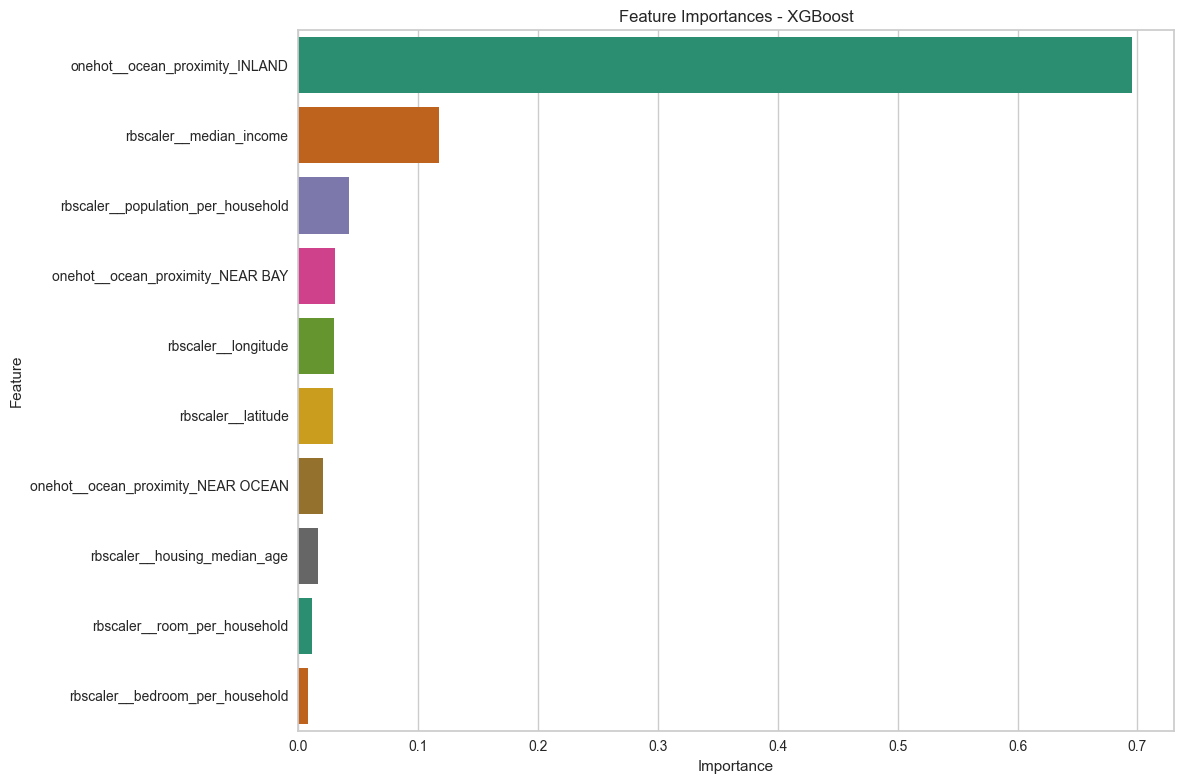

In [80]:
# Ambil model dan preprocessing dari pipeline terbaik
xgb_model = best_model.named_steps['model']
preprocessor = best_model.named_steps['preprocessing']

# Transformasi data training
X_train_transformed = preprocessor.transform(X_train)

# Ambil nama fitur
try:
    feature_names = preprocessor.get_feature_names_out()
except:
    feature_names = [f"feature_{i}" for i in range(X_train_transformed.shape[1])]

# Ambil feature importances
importances = xgb_model.feature_importances_

# Buat DataFrame dan visualisasi
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Visualisasi
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_df.head(20), x="Importance", y="Feature", palette="Dark2")
plt.title("Feature Importances - XGBoost")
plt.tight_layout()

# Tambahkan nilai angka di ujung bar
for i, (value) in enumerate(feature_importance_df.head(20)["Importance"]):
    ax.text(value + 0.001, i, f"{value:.4f}", va='center', ha='left', fontsize=9, color='black', zorder=10)
    
plt.show()

Insight:

- `onehot__ocean_proximity_INLAND`:
   - Fitur paling dominan, dengan kontribusi hampir 70% dari total importance.
   - Ini menunjukkan bahwa lokasi properti di area `INLAND` (tidak dekat laut) sangat berpengaruh terhadap harga rumah.
   - Model sangat bergantung pada informasi ini dalam membuat prediksi.

- `rbscaler__median_income`:
   - Faktor ekonomi seperti pendapatan median memiliki pengaruh signifikan terhadap harga rumah.
   - Ini masuk akal karena wilayah dengan pendapatan lebih tinggi cenderung memiliki harga rumah lebih tinggi juga.

- Fitur lainnya dengan kontribusi sedang:
   - `rbscaler__population_per_household`, `onehot__ocean_proximity_NEAR BAY`, `rbscaler__longitude`, `rbscaler__latitude`.
   - Faktor-faktor ini terkait dengan lokasi geografis dan kepadatan penduduk, yang juga cukup berpengaruh.

- Fitur dengan kontribusi rendah tapi tetap relevan:
   - Misalnya: `rbscaler__housing_median_age`, `rbscaler__room_per_household`, `rbscaler__bedroom_per_household`.
   - Fitur-fitur ini memberi tambahan informasi struktural tentang properti, meskipun dampaknya lebih kecil.

- Kesimpulan:

    - Faktor ekonomi `median_income` dan kepadatan penduduk juga memainkan peran penting.
    - Fitur struktural tetap berkontribusi, meskipun dampaknya relatif kecil.


## 8. Model Interpretation

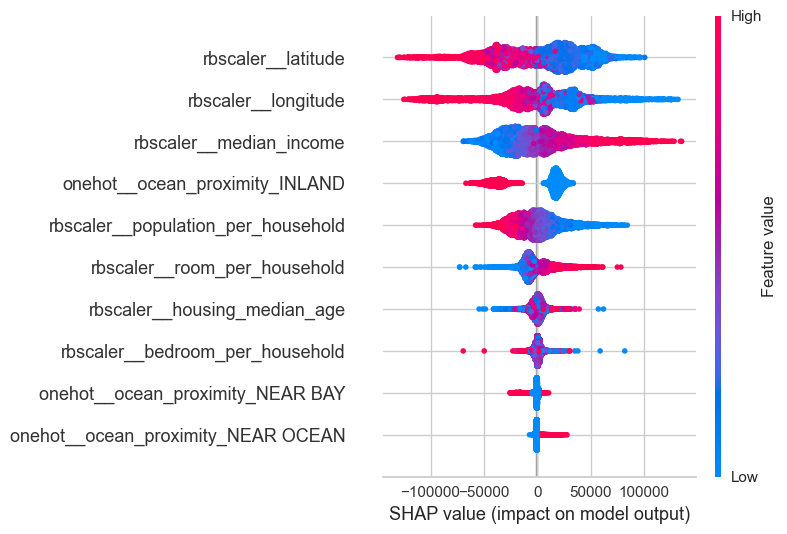

In [76]:
# Dapatkan best model dari grid search
best_model = grid_search.best_estimator_

# Fit model ke data training
best_model.fit(X_train, y_train)

# Ambil XGBoost model dan preprocessing pipeline
XGB_model = best_model.named_steps['model']
preprocessor = best_model.named_steps['preprocessing']

# Transformasi data training
X_train_transformed = preprocessor.transform(X_train)

# Ambil nama fitur setelah preprocessing
try:
    feature_names = preprocessor.get_feature_names_out()
except:
    # Fallback: buat nama fitur default jika get_feature_names_out tidak tersedia
    feature_names = [f"feature_{i}" for i in range(X_train_transformed.shape[1])]

# SHAP explainer
explainer = shap.TreeExplainer(XGB_model)
shap_values = explainer.shap_values(X_train_transformed)

# Tampilkan SHAP summary plot
shap.summary_plot(shap_values, X_train_transformed, feature_names=feature_names)

Insight:

- `rbscaler__latitude` dan `rbscaler__longitude`:
   - Koordinat geografis memiliki pengaruh besar, menunjukkan bahwa lokasi properti sangat menentukan harga.
   - Titik merah (nilai tinggi) berada di sisi kanan atau kiri tergantung apakah lokasi meningkatkan atau menurunkan harga.

- `rbscaler__median_income`:
   - Pendapatan median sangat berpengaruh.
   - Titik merah (income tinggi) dominan di sisi kanan → semakin tinggi income, semakin besar prediksi harga.

- `onehot__ocean_proximity_INLAND`:
   - Nilai biru (bukan INLAND) umumnya meningkatkan harga (SHAP positif).
   - Artinya, rumah yang tidak berada jauh dari laut cenderung memiliki harga lebih tinggi.

- `rbscaler__population_per_household`:
   - Nilai tinggi (merah) cenderung menurunkan prediksi harga (berada di sisi kiri).
   - Artinya, kepadatan rumah tangga yang tinggi mengurangi harga properti.

- `rbscaler__room_per_household` dan `rbscaler__bedroom_per_household`:
   - Fitur struktural ini memiliki pengaruh yang moderat, dan efeknya tergantung konteks nilai.

- Kesimpulan:

    - Model XGBoost secara eksplisit menangkap lokasi geografis, pendapatan, dan karakteristik kepadatan sebagai faktor utama dalam menentukan harga rumah.
    - SHAP memungkinkan pemahaman yang lebih dalam tentang bagaimana setiap fitur memengaruhi prediksi, bukan hanya seberapa penting fitur tersebut secara umum.
    - Visualisasi ini sangat berguna untuk mendukung interpretasi bisnis dan audit model.
    - Dapat digunakan sebagai dasar untuk membuat keputusan kebijakan harga properti, atau untuk analisis faktor utama dalam nilai real estate.

## 9. Cost Analyst

Interpretasi:

- **MAPE (Mean Absolute Percentage Error) sebesar ~15.89%**  
  Ini menunjukkan bahwa rata-rata kesalahan prediksi model terhadap harga rumah hanya sekitar 15.89% dari nilai sebenarnya. Dalam konteks bisnis properti, ini merupakan tingkat akurasi yang baik untuk digunakan dalam estimasi harga rumah.

- **RMSE (Root Mean Squared Error) sebesar $40,667.97**  
  Nilai ini mengindikasikan deviasi rata-rata antara prediksi dan harga aktual rumah. Meski cukup besar secara nominal, RMSE wajar untuk model yang memprediksi harga rumah di pasar seperti California, yang rentang harganya sangat tinggi.

- **MAE (Mean Absolute Error) sebesar $27,292.80**  
  Ini berarti secara rata-rata, prediksi harga rumah meleset sekitar $27 ribu dari harga sebenarnya. Angka ini penting dalam mengukur keakuratan absolut model dan relevan dalam perhitungan margin keuntungan dan strategi penawaran.
  
  Implikasi Keuangan:

- **Prediksi Lebih Akurat → Risiko Valuasi Lebih Rendah:**  
  Dengan MAE di bawah $30 ribu, perusahaan dapat menggunakan model ini untuk memberikan estimasi harga properti yang lebih realistis dan menghindari risiko overpricing atau underpricing.

- **Efisiensi Waktu & Operasional:**  
  Agen tidak lagi harus bergantung sepenuhnya pada intuisi atau riset manual yang memakan waktu. Model ini mendukung pengambilan keputusan cepat dan berbasis data.

- **Meningkatkan Kepercayaan Klien:**  
  Estimasi harga rumah berbasis machine learning yang dapat dijelaskan dan diukur akan memperkuat kredibilitas perusahaan di mata calon pembeli dan penjual.

Kesimpulan:

Model hasil tuning ini memberikan performa prediktif yang cukup baik untuk digunakan sebagai alat bantu valuasi harga rumah. Meskipun masih memiliki deviasi prediksi dalam kisaran puluhan ribu dolar, akurasinya sudah cukup untuk digunakan dalam praktik bisnis properti dan dapat terus ditingkatkan seiring bertambahnya data dan optimalisasi model.

## 10. Conclusion and Recommendation

### Conclusion

Berdasarkan eksplorasi data dan pengembangan model machine learning untuk memprediksi **median harga rumah di California**, diperoleh beberapa kesimpulan penting:

- Model XGBoost yang telah di-*tuning* menunjukkan performa prediktif yang cukup baik, dengan **MAPE ~15.89%**, **RMSE ~$40,667**, dan **MAE ~$27,293**.
- Fitur-fitur seperti **`median_income`**, **`latitude`**, dan **`ocean_proximity`** terbukti memiliki pengaruh signifikan terhadap nilai rumah.
- Akurasi model sudah cukup untuk mendukung proses valuasi properti oleh agen dalam menentukan harga jual atau beli rumah secara lebih objektif dan berbasis data.

### Recommendation

Sebagai perusahaan agen properti, berikut rekomendasi yang dapat diambil dari hasil proyek ini:

1. **Integrasikan Model ke dalam Sistem Internal**  
   Gunakan model ini untuk mendukung agen di lapangan dalam memberi estimasi harga rumah yang cepat dan akurat melalui aplikasi internal atau dashboard interaktif.

2. **Gunakan Model Sebagai Pendukung Penentuan Strategi Harga**  
   Prediksi harga rumah dari model dapat digunakan sebagai pembanding terhadap penilaian manual untuk menghindari risiko overpricing (rumah tidak laku) dan underpricing (kehilangan margin keuntungan).

3. **Fokus pada Fitur dengan Pengaruh Tinggi**  
   Dalam strategi pemasaran dan listing, soroti atribut-atribut yang terbukti memengaruhi harga, seperti lokasi, pendapatan lingkungan, dan kedekatan dengan laut.

4. **Lakukan Update dan Retraining Model Secara Berkala**  
   Karena tren pasar dan harga rumah dapat berubah, sangat disarankan untuk terus memperbarui data dan melakukan retraining model minimal setiap kuartal atau semester.

5. **Pertimbangkan Penambahan Fitur Eksternal**  
   Misalnya data kriminalitas, kualitas sekolah, akses transportasi, atau kebijakan lokal yang dapat memperkaya konteks prediksi dan meningkatkan akurasi model.

Dengan mengadopsi pendekatan data-driven ini, perusahaan dapat meningkatkan efisiensi operasional, mempercepat proses pengambilan keputusan, serta memperkuat kepercayaan klien terhadap penilaian harga rumah yang diberikan.

### Limitasi Model

Meskipun model XGBoost yang telah dibangun dan di-tuning menunjukkan performa yang baik dalam memprediksi median harga rumah di California, terdapat beberapa keterbatasan yang perlu diperhatikan:

#### 1.  Keterbatasan Fitur
- Fitur yang dapat digunakan hanya `longitude`, `latitude`, `housing_median_age`, `median_income`, `population_per_household`, `room_per_household`, `bedroom_per_household`
- Tidak mencakup informasi penting lainnya yang berpotensi memengaruhi harga rumah seperti:
  - Kualitas sekolah di sekitar
  - Akses terhadap transportasi umum
  - Tingkat kriminalitas
  - Fasilitas publik (taman, pusat belanja, rumah sakit)
  - Kondisi fisik properti (renovasi, tipe bangunan, interior)

#### 2.  Generalisasi Lokasi
- Model dilatih khusus menggunakan data dari wilayah California. Maka, hasil prediksi **tidak dapat digeneralisasi** ke daerah atau negara bagian lain tanpa pelatihan ulang menggunakan data lokal.

#### 3. Dinamika Pasar
- Data yang digunakan bersifat statis (snapshot waktu tertentu).

## 11. Save Model

In [83]:
# Simpan
joblib.dump(model, 'California_House_Price_Prediction_XGBoost.joblib')

# Load
model_loaded = joblib.load('California_House_Price_Prediction_XGBoost.joblib')